In [1]:
import pandas as pd
import numpy as np

from pycaret.classification import *
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss

In [2]:
data_raw = catalog.load("raw_data_kobe")
data_raw

[04/13/23 11:49:11] INFO     Loading data from 'raw_data_kobe' (CSVDataSet)...                  ]8;id=514939;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=214335;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


Os seguintes dados relacionados ao arremesso efetuado serão utilizados na modelagem:  
* lat:  latitude do arremesso - (variável contínua)  
* lon:  longitude do arremesso - (variável contínua)  
* minutes_remaining: minutos que faltam para o fim do período (1 a 11 min) - (variável contínua)  
* period: o período do jogo do arremesso. Um jogo de basquete possui, na NBA (National Basketball Association) ou liga internacional, 4 períodos de 12 minutos. Em caso de empate pode haver mais alguns períodos de 5 minutos para desempatar. (variável categórica)  
* playoffs: se a partida era dos playoffs ou não - (variável booleana e categórica)  
* shot_distance: distância do arremesso - (variável contínua)  
* shot_made_flag: Se o arremesso foi bem sucedido ou não (variável booleana categórica - preditora da classificação)  

In [3]:
data_intermediate = catalog.load("data_filtered")
data_intermediate

[04/13/23 11:49:15] INFO     Loading data from 'data_filtered' (ParquetDataSet)...              ]8;id=42487;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=489346;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
0,33.9723,-118.1028,10,1,0,18,NaN
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
...,...,...,...,...,...,...,...
30691,34.0443,-118.2698,7,4,1,0,0.0
30692,33.9963,-118.2688,6,4,1,4,0.0
30693,34.0443,-118.2698,6,4,1,0,NaN
30694,33.8783,-118.4038,3,4,1,21,1.0


In [4]:
data_intermediate.isna().sum()

lat                     0
lon                     0
minutes_remaining       0
period                  0
playoffs                0
shot_distance           0
shot_made_flag       3986
dtype: int64

Os dados foram conformados retirando-se os dados faltantes que tinha na coluna `shot_made_flag`

In [5]:
data_primary = catalog.load("data_conformed")
data_primary

[04/13/23 11:49:21] INFO     Loading data from 'data_conformed' (ParquetDataSet)...             ]8;id=725708;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=304324;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0
...,...,...,...,...,...,...,...
30690,33.9443,-118.3828,11,4,1,15,0.0
30691,34.0443,-118.2698,7,4,1,0,0.0
30692,33.9963,-118.2688,6,4,1,4,0.0
30694,33.8783,-118.4038,3,4,1,21,1.0


In [6]:
data_primary['shot_made_flag'].value_counts()

0.0    10602
1.0     9683
Name: shot_made_flag, dtype: int64

<Axes: >

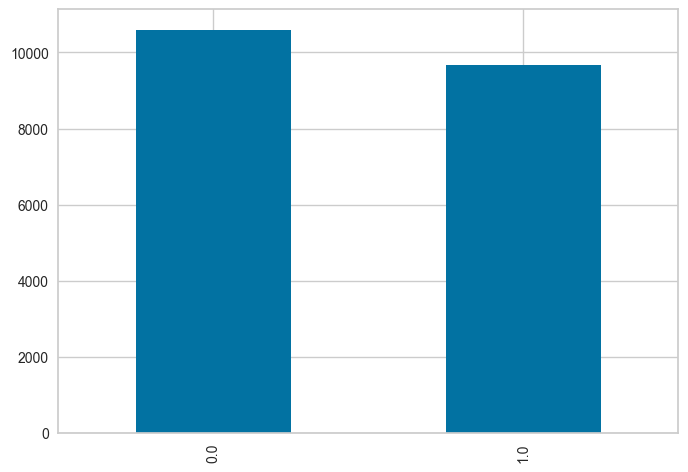

In [7]:
data_primary['shot_made_flag'].value_counts().plot(kind = 'bar')

Verificou-se que a base está balanceada com uma quantidade um pouco maior de arremessos fracassados (`shot_made_flag = 0`)

In [8]:
# Base está balanceada
data_primary['shot_made_flag'].value_counts(normalize=True)

0.0    0.522652
1.0    0.477348
Name: shot_made_flag, dtype: float64

### Por variável

Para cada variável independente iremos observar sua variação em relação a variável preditora.

#### lat:  latitude do arremesso

<Axes: xlabel='lat', ylabel='Count'>

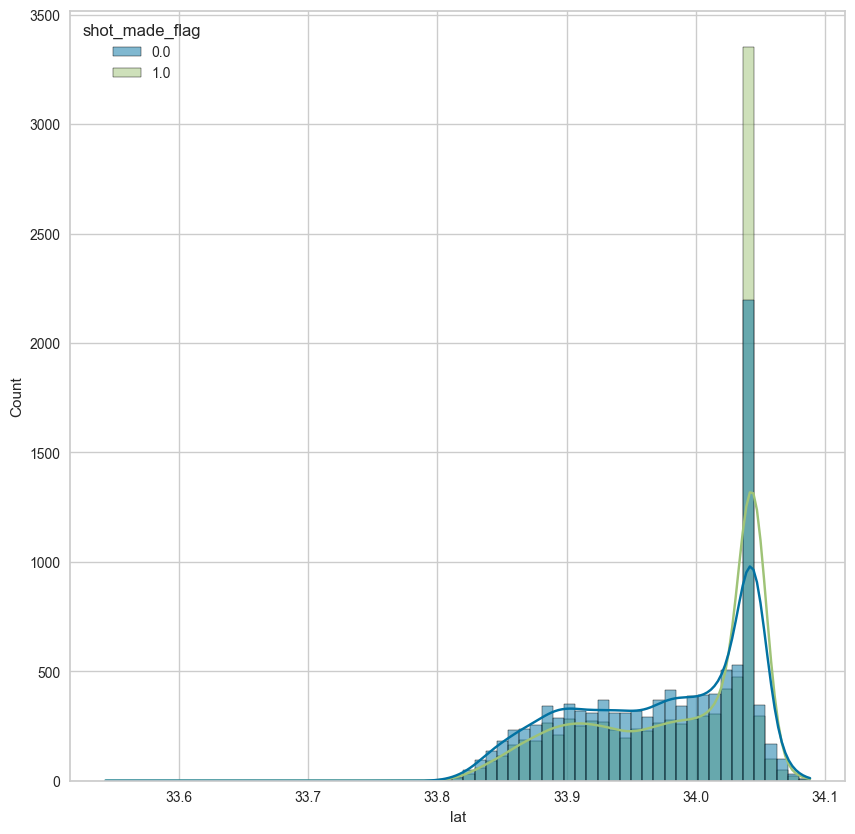

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data = data_primary, x = 'lat', kde=True, hue = 'shot_made_flag')

#### lon:  longitude do arremesso

<Axes: xlabel='lon', ylabel='Count'>

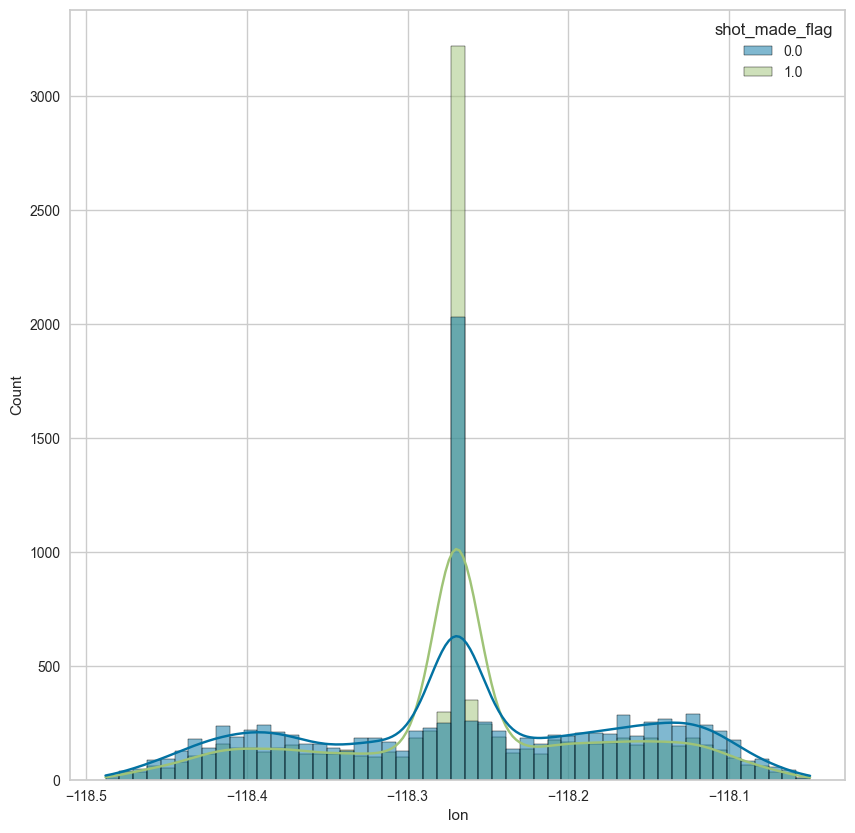

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data = data_primary, x = 'lon', kde=True, hue = 'shot_made_flag')

#### minutes_remaining: minutos que faltam para o fim do período (1 a 11 min)

<Axes: xlabel='minutes_remaining', ylabel='Count'>

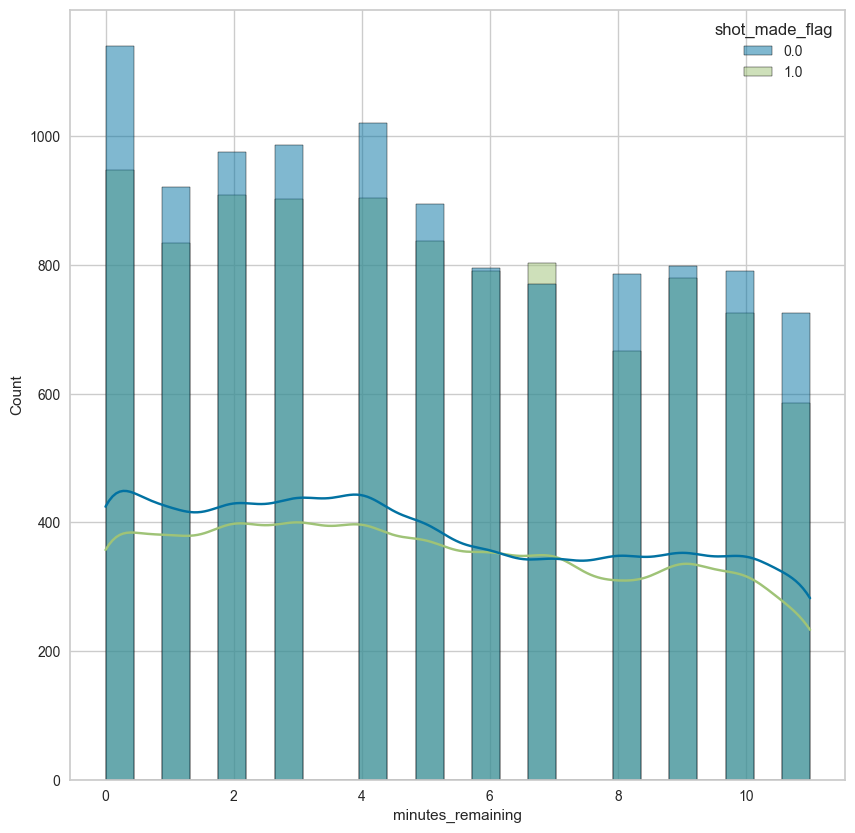

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data = data_primary, x = 'minutes_remaining', kde=True, hue = 'shot_made_flag')

#### period: o período do jogo do arremesso

<Axes: xlabel='period', ylabel='Count'>

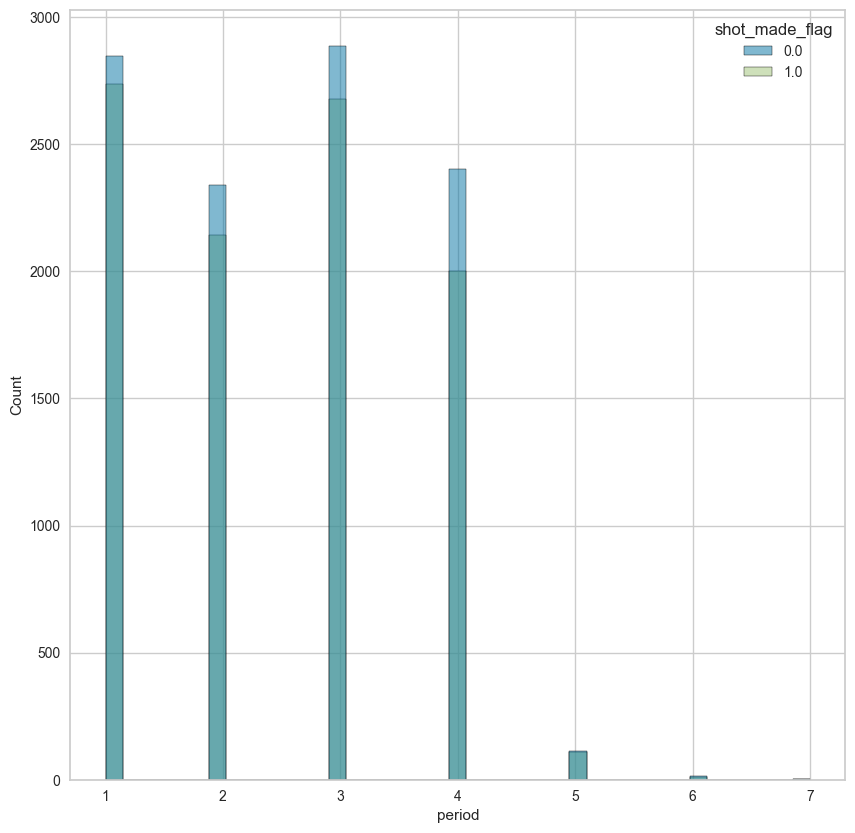

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data = data_primary, x = 'period', hue = 'shot_made_flag')

#### playoffs: se a partida era dos playoffs ou não

<Axes: xlabel='playoffs', ylabel='Count'>

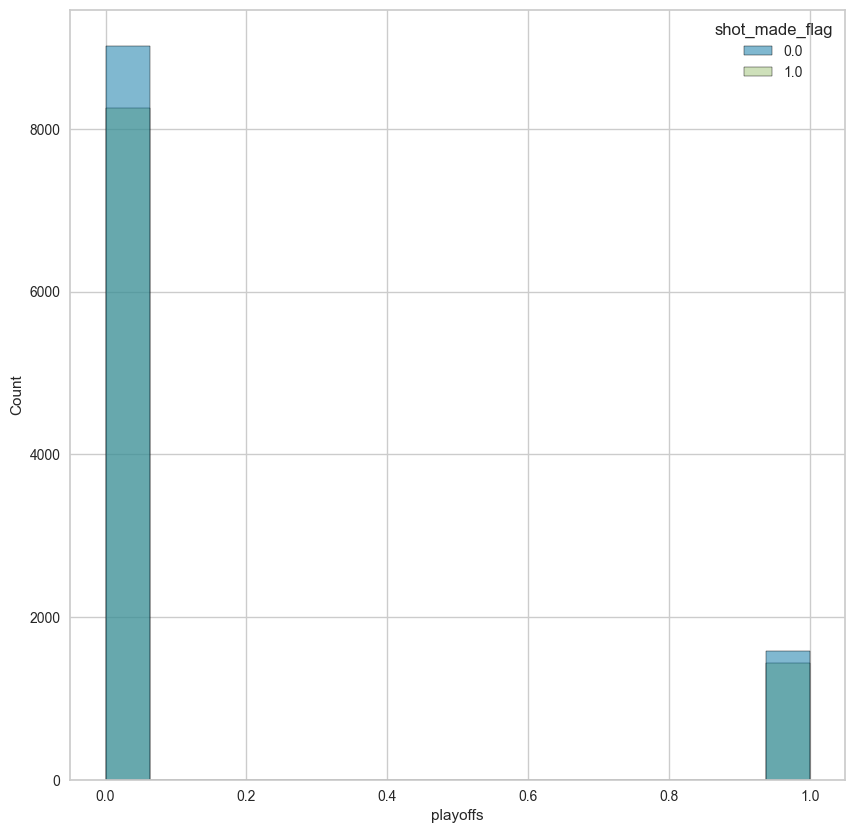

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data = data_primary, x = 'playoffs', hue = 'shot_made_flag')

#### shot_distance: distância do arremesso

Claramente, qundo o arremesso é realizado bem próximo à cesta a probabilidade de sucesso é maior.

<Axes: xlabel='shot_distance', ylabel='Count'>

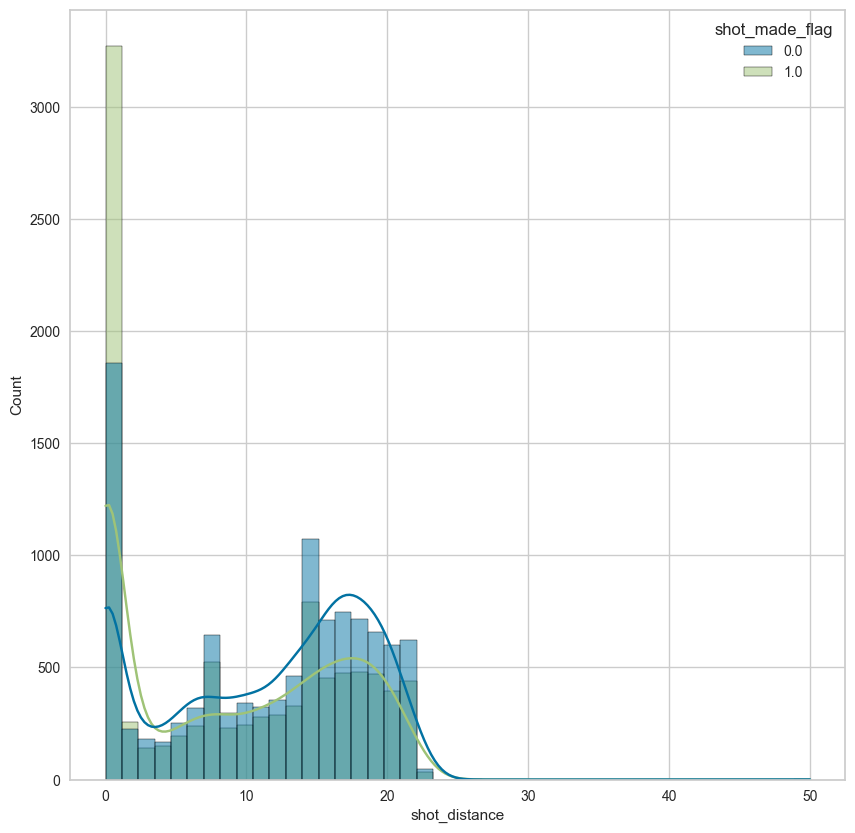

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data = data_primary, x = 'shot_distance',kde=True, hue = 'shot_made_flag')

### Separação treino e teste

In [15]:
base_train = catalog.load("base_train")
base_train

[04/13/23 11:49:56] INFO     Loading data from 'base_train' (ParquetDataSet)...                 ]8;id=568827;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=481947;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11476,34.0443,-118.2698,2,2,0,0,0.0
26552,34.0373,-118.3888,7,3,1,11,0.0
1209,34.0443,-118.2698,2,3,0,0,1.0
28269,34.0133,-118.4028,5,4,1,13,0.0
10504,34.0453,-118.1038,2,1,0,16,1.0
...,...,...,...,...,...,...,...
12390,34.0443,-118.2698,11,2,0,0,0.0
15071,33.9773,-118.4788,5,2,0,21,0.0
27609,33.9553,-118.2598,0,3,1,8,1.0
13,34.0403,-118.3638,2,1,0,9,0.0


In [16]:
base_train['shot_made_flag'].value_counts(normalize=True)

0.0    0.525018
1.0    0.474982
Name: shot_made_flag, dtype: float64

In [17]:
base_test = catalog.load("base_test")
base_test

[04/13/23 11:49:58] INFO     Loading data from 'base_test' (ParquetDataSet)...                  ]8;id=958111;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=296564;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
6494,34.0443,-118.2698,5,4,0,0,1.0
2113,34.0313,-118.3028,7,1,0,3,0.0
5061,34.0493,-118.1798,2,2,0,9,0.0
24559,33.9873,-118.3828,7,1,0,12,0.0
30414,34.0443,-118.2698,3,3,1,0,0.0
...,...,...,...,...,...,...,...
21484,33.9073,-118.1448,4,1,0,18,1.0
24648,34.0653,-118.3788,7,4,0,11,1.0
1260,34.0443,-118.2698,2,3,0,0,0.0
10221,33.9983,-118.2488,5,2,0,5,0.0


In [21]:
base_test['shot_made_flag'].value_counts(normalize=True)

0.0    0.513187
1.0    0.486813
Name: shot_made_flag, dtype: float64